# Normal Distribution

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import statsmodels.api as sm
import pylab as py
from scipy.stats import probplot

warnings.filterwarnings(action='ignore')

In [31]:
df_red = pd.read_csv("./data/winequality-red(processed).csv", encoding='utf-8')
df_white = pd.read_csv("./data/winequality-white(processed).csv")

In [3]:
print(df_red.shape)
df_red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df_white.shape)
df_white.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


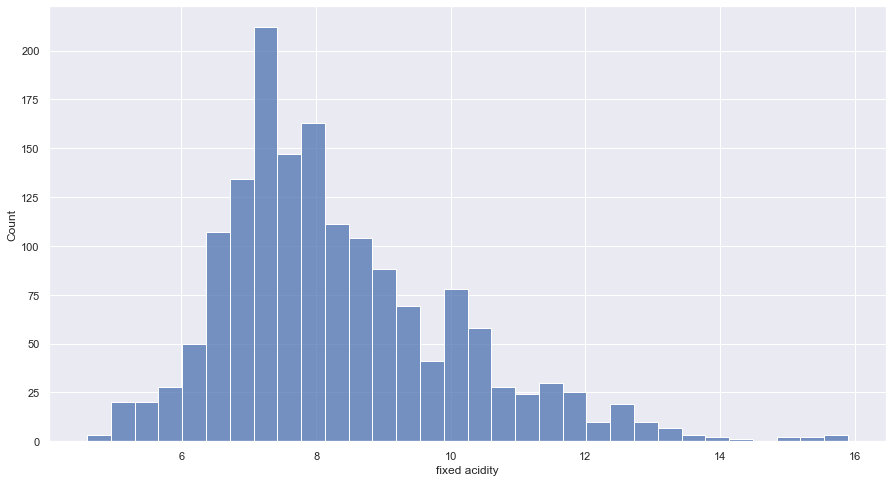

In [5]:
sns.histplot(df_red['fixed acidity'])
plt.show()

In [6]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_red['fixed acidity'].mean()

8.319637273295838

In [8]:
mu = df_red['fixed acidity'].mean()
sigma = df_red['fixed acidity'].std()
print(mu, sigma)

8.319637273295838 1.7410963181277006


### norm

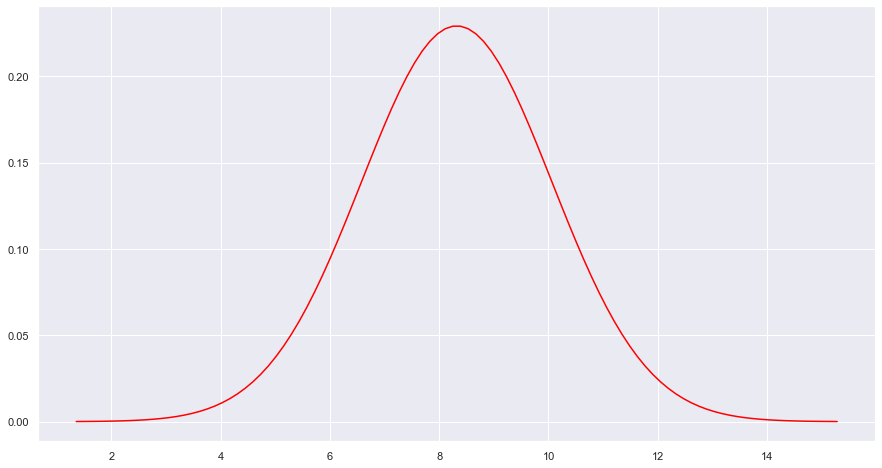

In [9]:
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y,'red')
plt.show()

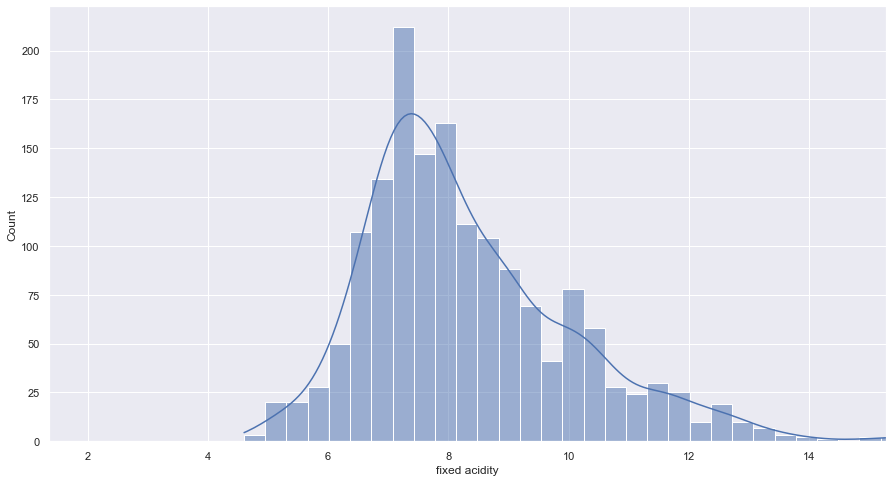

In [10]:
sns.histplot(df_red['fixed acidity'], kde=True)
plt.xlim(mu-4*sigma, mu+4*sigma)
plt.show()

In [11]:
mu-1

7.319637273295838

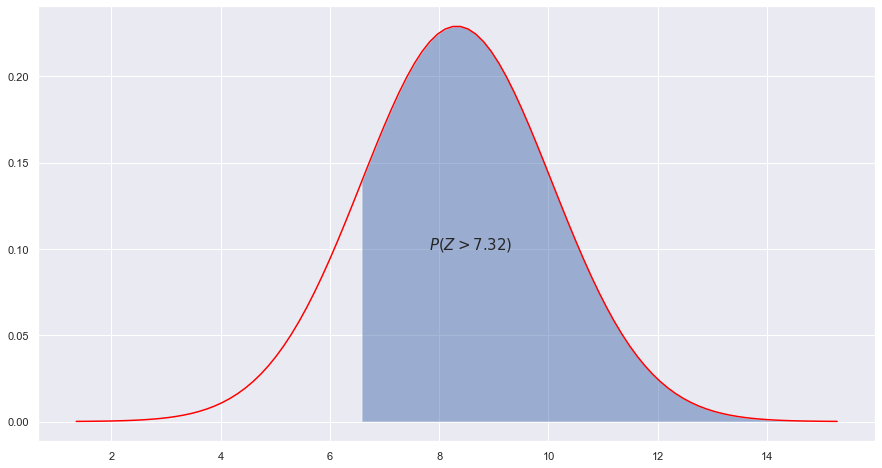

In [12]:
xx = np.linspace(mu-1*sigma, mu+4*sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.5)
plt.text(mu-0.5, 0.1, '$P(Z>7.32)$', fontsize=15)
plt.show()

In [13]:
# 레드와인의 fixed acidity가 mu-1보다 클 확률은 71.7%다
1-stats.norm.cdf(loc=mu, scale=sigma, x=(mu-1))

0.7171347680622043

상위 10% 값 : 10.550941985556332
하위 10% 값 : 6.088332561035344


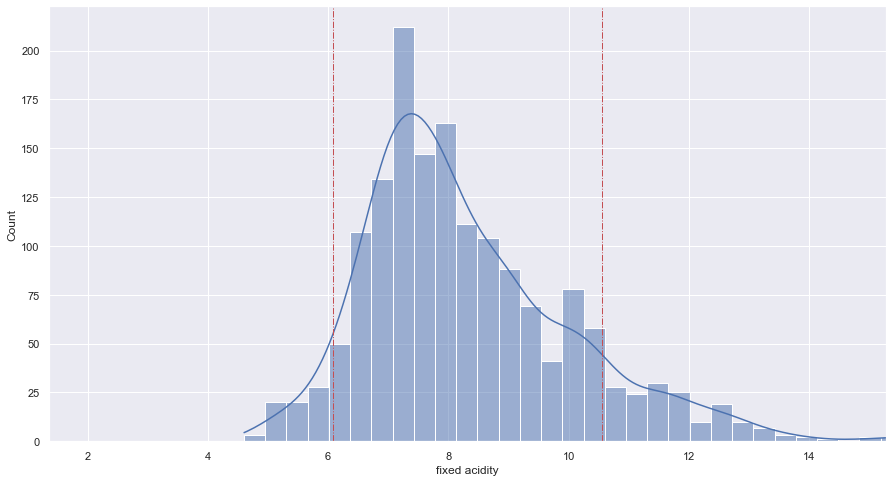

In [14]:
#Percent point function
print(f'상위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.9)}')
print(f'하위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.1)}')
sns.histplot(df_red['fixed acidity'], kde=True)
plt.xlim(mu-4*sigma, mu+4*sigma)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.9), linestyle='-.', color='r', linewidth=1)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.1), linestyle='-.', color='r', linewidth=1)
plt.show()

상위 10% 값 : 17.37218479452509
하위 10% 값 : -0.7329102477630567


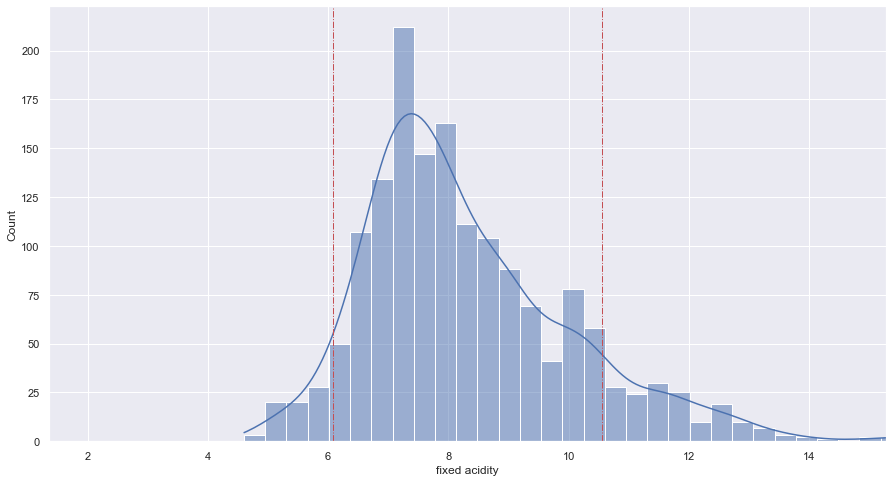

In [20]:
# Percent point function
# 정규분포와 유사하지 않다면 음의 값이 나올 수 있다.
print(f'상위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.9999999)}')
print(f'하위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.0000001)}')
sns.histplot(df_red['fixed acidity'], kde=True)
plt.xlim(mu-4*sigma, mu+4*sigma)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.9), linestyle='-.', color='r', linewidth=1)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.1), linestyle='-.', color='r', linewidth=1)
plt.show()

In [15]:
df_red['fixed acidity'].describe(percentiles=[0.1, 0.9])

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
10%         6.500000
50%         7.900000
90%        10.700000
max        15.900000
Name: fixed acidity, dtype: float64

### t

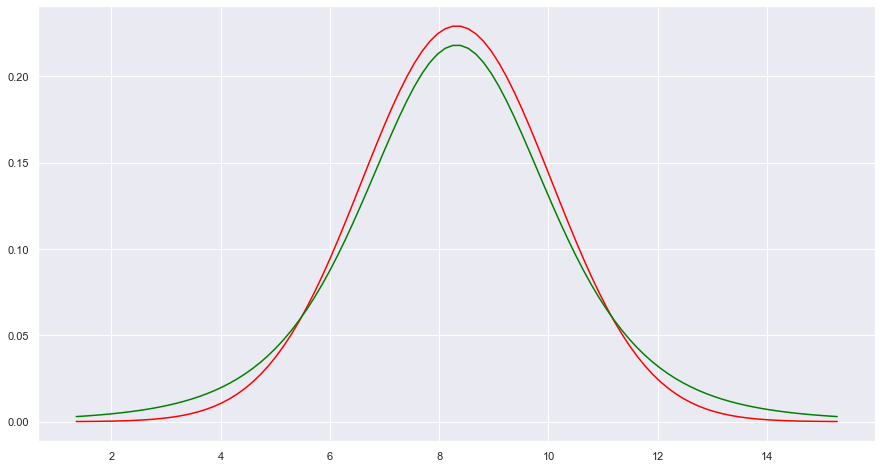

In [16]:
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y_norm = stats.norm.pdf(x, mu, sigma)
y_t = stats.t.pdf(x, loc=mu, scale=sigma, df=5)

plt.plot(x, y_norm,'red')
plt.plot(x, y_t,'green')
plt.show()

### Chi Square

In [21]:
df_red.shape

(1599, 12)

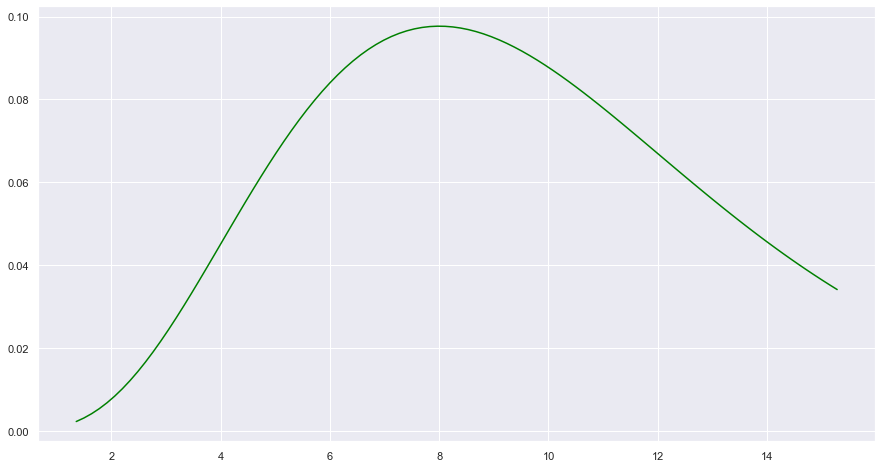

In [38]:
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
# y_norm = stats.norm.pdf(x, mu, sigma)
y_chi2 = stats.chi2.pdf(x=x, df=10)

# plt.plot(x, y_norm,'red')
plt.plot(x, y_chi2,'green')
plt.show()

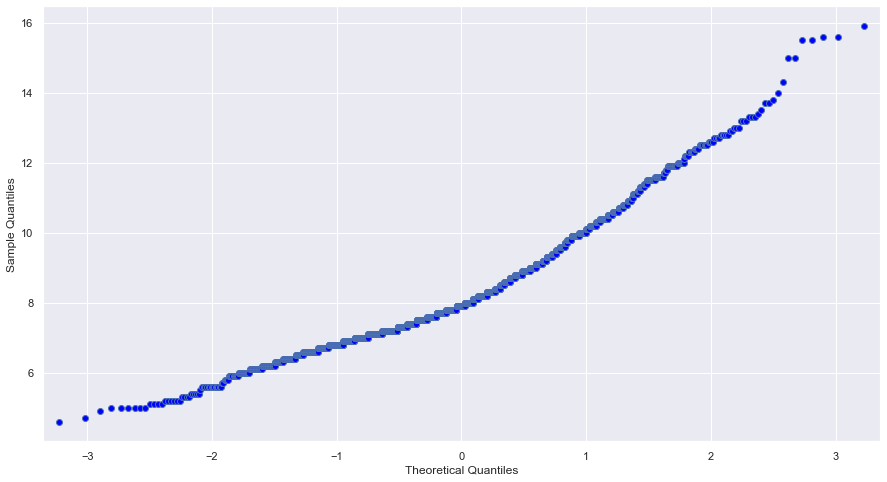

In [47]:
sm.qqplot(df_red['fixed acidity'])
py.show()

In [48]:
stats.shapiro(df_red['fixed acidity'])

ShapiroResult(statistic=0.942030668258667, pvalue=1.5255951637239901e-24)

In [49]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

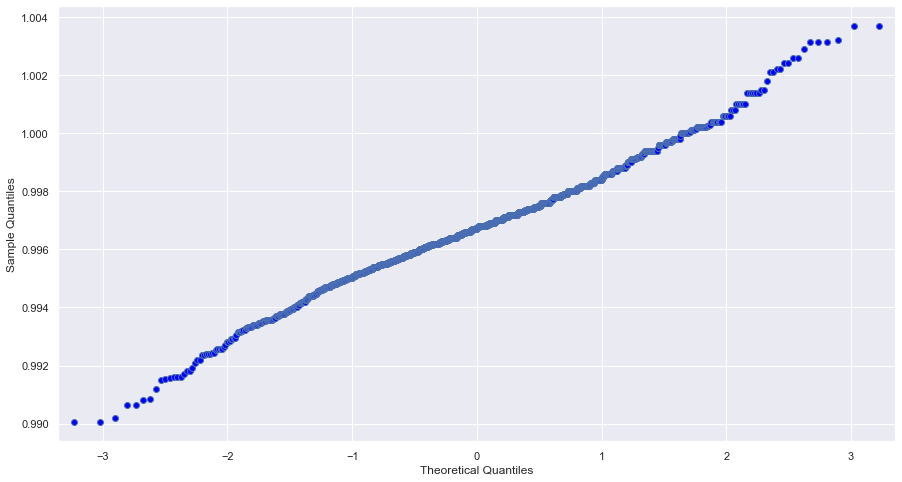

In [56]:
sm.qqplot(df_red['density'])
py.show()

In [57]:
stats.shapiro(df_red['density'])

ShapiroResult(statistic=0.9908668398857117, pvalue=1.9400959061499634e-08)

- 샘플링 했을때는 정규성 검정을 만족하는 변수들이 있다. 아웃라이어가 존재한다고 판단

In [62]:
for q in df_red.columns:
    print(q, stats.shapiro(df_red[q].sample(50)), "\n")

fixed acidity ShapiroResult(statistic=0.9235777258872986, pvalue=0.003183490363880992) 

volatile acidity ShapiroResult(statistic=0.9327234625816345, pvalue=0.007016313727945089) 

citric acid ShapiroResult(statistic=0.9482629895210266, pvalue=0.028959115967154503) 

residual sugar ShapiroResult(statistic=0.4943568706512451, pvalue=6.996148885912712e-12) 

chlorides ShapiroResult(statistic=0.5541295409202576, pvalue=4.3005137645435454e-11) 

free sulfur dioxide ShapiroResult(statistic=0.9508829116821289, pvalue=0.037090886384248734) 

total sulfur dioxide ShapiroResult(statistic=0.8545145988464355, pvalue=2.0546283849398606e-05) 

density ShapiroResult(statistic=0.9795300364494324, pvalue=0.532316267490387) 

pH ShapiroResult(statistic=0.9654045701026917, pvalue=0.1496272087097168) 

sulphates ShapiroResult(statistic=0.9570503234863281, pvalue=0.06689265370368958) 

alcohol ShapiroResult(statistic=0.9327359795570374, pvalue=0.0070240735076367855) 

quality ShapiroResult(statistic=0.830

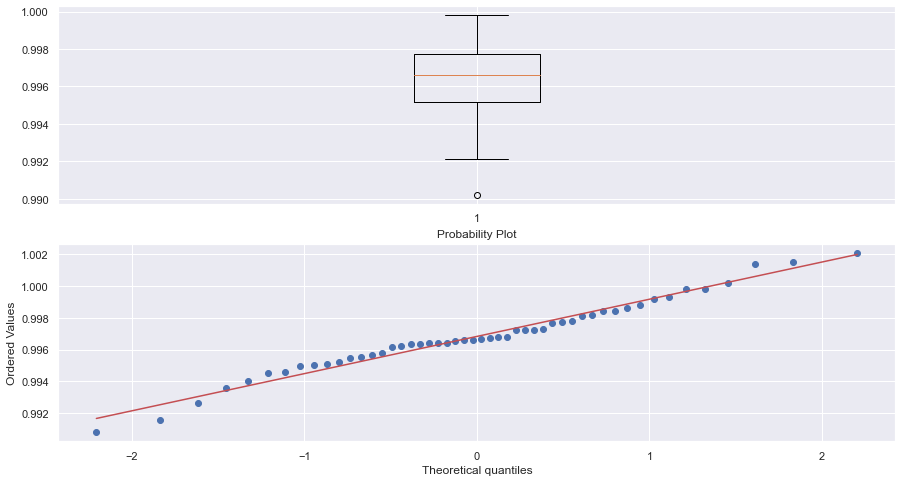

In [98]:
np.random.seed(0)
f, axes = plt.subplots(2, 1)
axes[0].boxplot(df_red['density'].sample(50))
probplot(df_red['density'].sample(50), plot=axes[1])
plt.show()

# 연습문제
- 모든 연습문제는 winequality-red(processed).csv의 데이터를 sampling하여 작성

### 1

In [32]:
#(a)
np.random.seed(0) #난수 고정
X = np.random.normal(3, 5, 20)
X

array([11.82026173,  5.00078604,  7.89368992, 14.204466  , 12.33778995,
       -1.8863894 ,  7.75044209,  2.24321396,  2.48390574,  5.05299251,
        3.72021786, 10.27136753,  6.80518863,  3.60837508,  5.21931616,
        4.66837164, 10.47039537,  1.97420868,  4.56533851, -1.2704787 ])

In [33]:
#(b)
print(X.mean(), X.std())

5.8466729647281745 4.250914001997329


<AxesSubplot:ylabel='Count'>

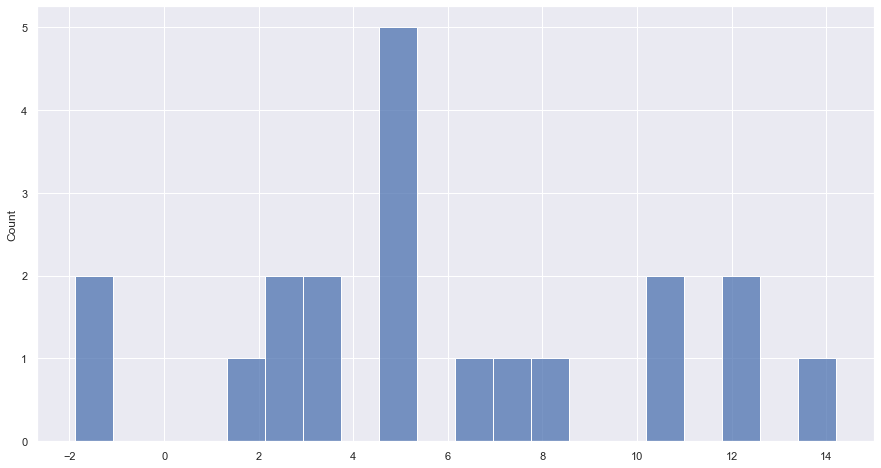

In [36]:
#(c)
sns.histplot(X, bins=20)

- winedata

In [12]:
#(a)
X = df_red['density'].sample(20)
X

1109    0.99820
1032    0.99854
1002    0.99516
487     0.99820
979     0.99690
1054    0.99747
542     0.99660
853     0.99652
1189    0.99616
412     0.99660
1099    0.99666
475     0.99880
799     0.99870
553     0.99340
1537    0.99484
1586    0.99492
805     0.99356
1095    0.99772
1547    0.99306
18      0.99740
Name: density, dtype: float64

In [15]:
#(b)
print(X.mean(), X.std())

0.9964705 0.0017881171367493901


<AxesSubplot:xlabel='density', ylabel='Count'>

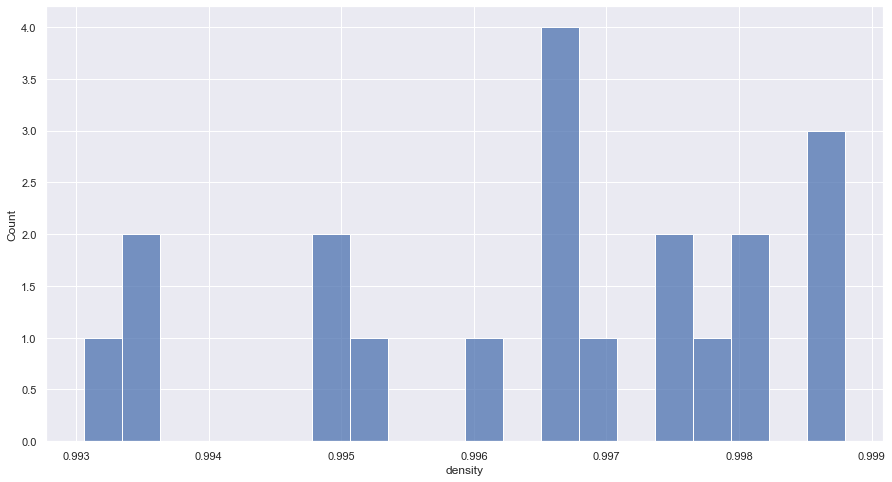

In [19]:
#(c)
import seaborn as sns
sns.histplot(X, bins=20)

### 2

In [40]:
#(a)
np.random.seed(0) #난수 고정
X = np.random.poisson(3, 10)
X

array([5, 6, 2, 0, 7, 3, 3, 1, 6, 1])

In [41]:
#(b)
print(X.mean(), X.std())

3.4 2.33238075793812


<AxesSubplot:ylabel='Count'>

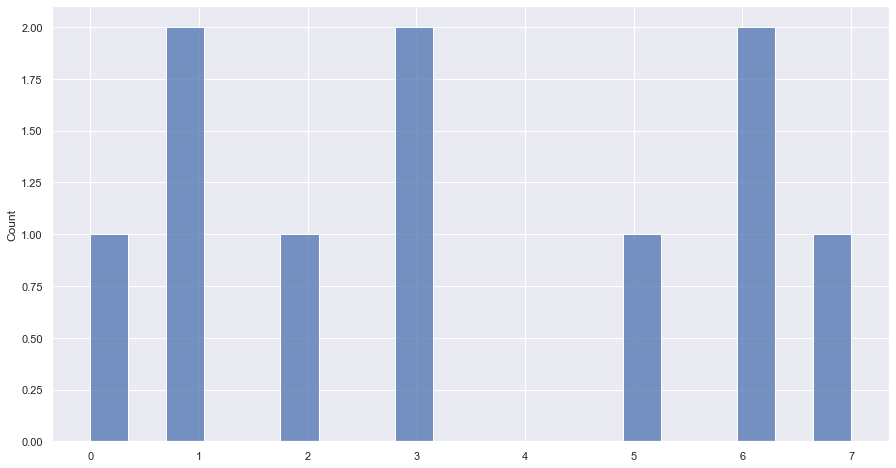

In [42]:
#(c)
sns.histplot(X, bins=20)

### 3

In [75]:
stats.norm.ppf(loc=mu, scale=sigma, q=0.6)

10.760041309407399

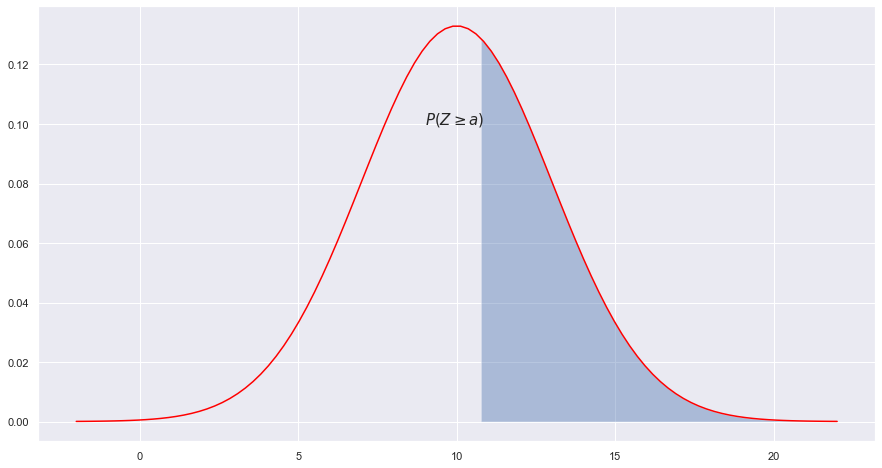

In [99]:
mu = 10
sigma = 3

x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(10.760041309407399, mu+4*sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.4)
plt.text(mu-1, 0.1, '$P(Z{\geq}a)$', fontsize=15)
plt.show()

In [105]:
#(b)
res = stats.norm.sf(loc=mu, scale=sigma, x=12)
res

0.2524925375469229

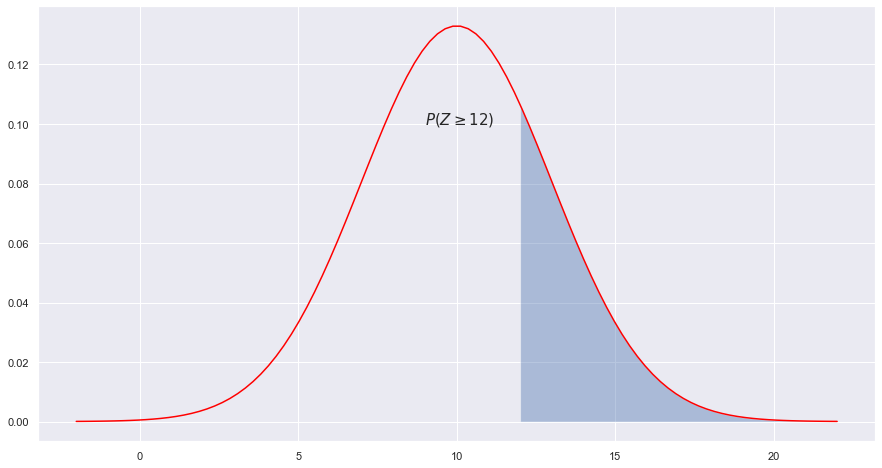

In [108]:
mu = 10
sigma = 3

x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(12, mu+4*sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.4)
plt.text(mu-1, 0.1, '$P(Z{\geq}12)$', fontsize=15)
plt.show()

In [112]:
#(c)
b = stats.norm.cdf(loc=mu, scale=sigma, x=11.5)
a = stats.norm.cdf(loc=mu, scale=sigma, x=-11.5)

In [115]:
sub = b-a
b, a, sub

(0.6914624612740131, 3.8422916057631645e-13, 0.6914624612736289)

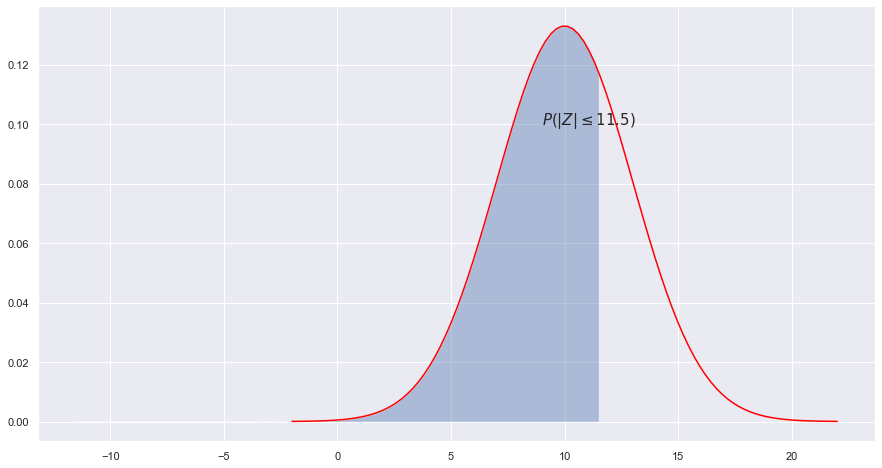

In [121]:
mu = 10
sigma = 3

x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(-11.5, 11.5, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.4)
plt.text(mu-1, 0.1, '$P(|Z|{\leq}11.5)$', fontsize=15)
plt.show()

### 4

In [128]:
#(a)
a = stats.norm.ppf(loc=0, scale=1, q=0.05)
b = stats.norm.ppf(loc=0, scale=1, q=0.95)
print(a, b)

-1.6448536269514729 1.6448536269514722


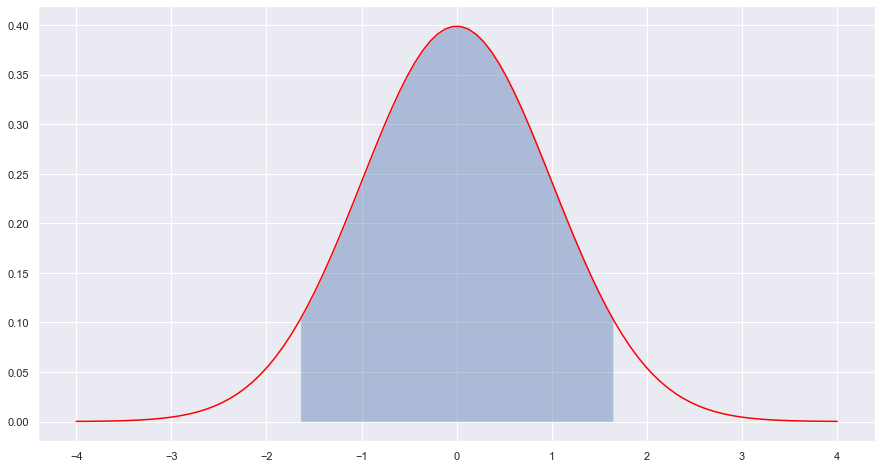

In [129]:
mu = 0
sigma = 1

x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(a, b, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.4)
plt.show()

In [130]:
#(b)
a = stats.norm.ppf(loc=0, scale=1, q=0.025)
b = stats.norm.ppf(loc=0, scale=1, q=0.975)
print(a, b)

-1.9599639845400545 1.959963984540054


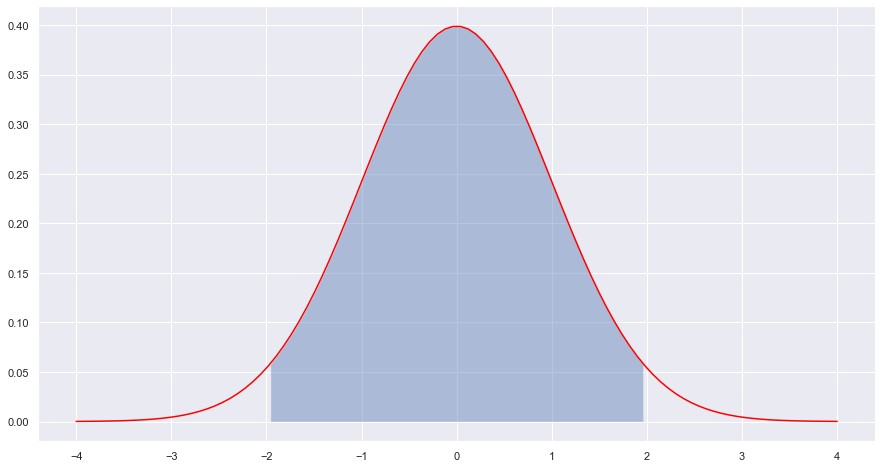

In [131]:
mu = 0
sigma = 1

x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(a, b, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.4)
plt.show()

### 5

In [49]:
# 동전을 두 번 던진다. 앞면이 나올 누적분포확률?
# 이항분포, B(2, 1/2)
# 0번 나올 확률 : 0.5*0.5 = 0.25
# 1번 나올 확률 : 0.5 = 0.5 누적 0.75
# 2번 나올 확률 : 0.5*0.5 = 0.25 누적 1.0

stats.binom.cdf(n=2, p=1/2, k=[0, 1, 2])

array([0.25, 0.75, 1.  ])

In [50]:
# answer
stats.binom.cdf(n=5, p=1/6, k=[0,1,2,3,4,5])

array([0.40187757, 0.80375514, 0.96450617, 0.99665638, 0.9998714 ,
       1.        ])

In [52]:
# 두 번이하로 나올 확률을 1에서 뺀다
1-stats.binom.cdf(n=5, p=1/6, k=2)

0.035493827160493874

### 6

In [55]:
a = stats.binom.cdf(n=10000, p=1/2, k=4980)
a

0.34826929248839317

In [56]:
b = stats.binom.cdf(n=10000, p=1/2, k=5020)
b

0.6590959835321635

In [57]:
b-a

0.3108266910437703

In [59]:
stats.binom.cdf(n=10000,p=0.5,k=5020)-stats.binom.cdf(n=10000,p=0.5,k=4979) #4979!

0.318191967064327

### 7

In [99]:
#(a)
x = 2.5
stats.t.sf(x=x, df=10)

0.015723422118304388

In [87]:
#(b)
x = -2.5
stats.t.cdf(x=x, df=10)

0.015723422118304388

In [92]:
#(c)
a, b = -1.8, 1.8
sum([1-stats.t.cdf(x=b, df=10), stats.t.cdf(x=a, df=10)])

0.10205224313467906

In [100]:
#(d)
x = 2.5
1-stats.t.cdf(x=x, df=10)

0.015723422118304353

In [103]:
#(e)
x = -2.5
1-stats.t.sf(x=x, df=10)

0.015723422118304353

In [105]:
#(f)
a, b = -1, 1.5
stats.t.cdf(x=b, df=10)- stats.t.cdf(x=a, df=10)

0.7472997706262499

### 8

In [111]:
#(a)
mu=3
stats.poisson.cdf(mu=mu, k=[0, 1, 2, 3])

array([0.04978707, 0.19914827, 0.42319008, 0.64723189])

In [112]:
1-stats.poisson.cdf(mu=mu, k=2)

0.5768099188731564

In [113]:
#(b)
stats.poisson.cdf(mu=mu, k=3)

0.6472318887822313

In [114]:
#(c)
stats.poisson.cdf(mu=mu, k=7) - stats.poisson.cdf(mu=mu, k=1)

0.7889472226721868

In [116]:
#(d)
stats.poisson.cdf(mu=mu, k=4)

0.8152632445237722

### 9

<AxesSubplot:ylabel='Count'>

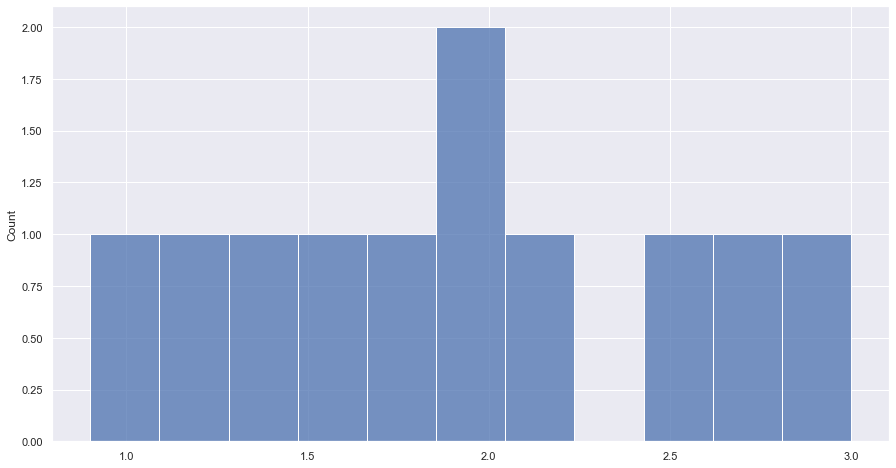

In [3]:
data = [1.5, 2.2, 0.9, 1.3, 2.0, 1.2, 2.5, 2.7, 1.8, 2,3]

#(a)
sns.histplot(data, bins=len(data))

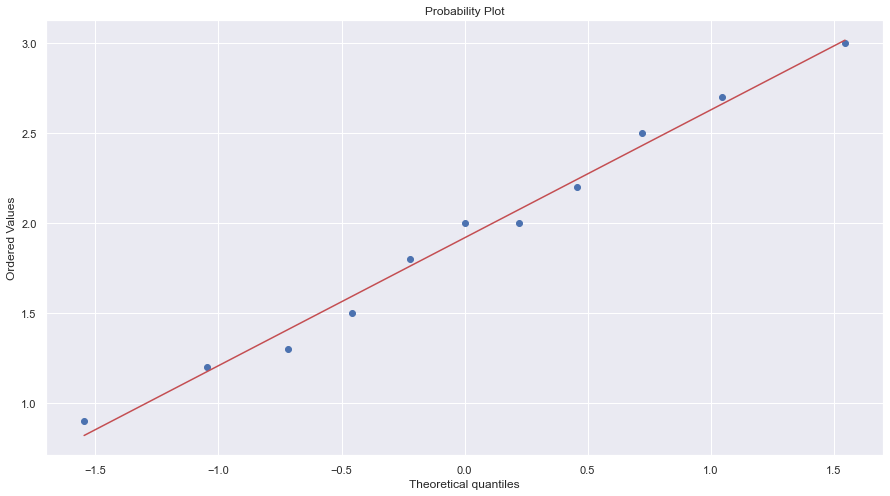

In [26]:
#(b)
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(data, plot=ax)
plt.show()

In [28]:
#(c)
stats.shapiro(data)

ShapiroResult(statistic=0.9774404764175415, pvalue=0.9502578377723694)

In [30]:
#(d)
pd.DataFrame(data).describe()

,0
count,11.000000
mean,1.918182
std,0.658511
min,0.900000
25%,1.400000
50%,2.000000
75%,2.350000
max,3.000000


### 10
- data넣기 귀찮아서 whitewine density데이터 40개로 대체

In [34]:
data = df_white.density.sample(40)
data

2473    0.99658
2140    0.99980
953     0.99280
715     0.99330
4506    0.99040
686     0.99380
1505    0.99450
863     0.99000
4865    0.98822
1661    0.99540
1439    0.99560
2513    0.99214
4002    0.99782
2239    0.99740
4839    0.99125
3266    0.99407
213     0.99440
1335    0.99500
3677    0.99275
3049    0.99711
3916    0.99021
4807    0.99252
2933    0.99326
4232    0.99206
122     0.99520
2287    0.99471
2039    0.99260
817     0.99675
3224    0.99130
2837    0.99581
762     1.00055
3421    0.99036
4338    0.99807
517     0.99200
2676    0.99094
2168    0.99860
328     0.99780
1608    1.00240
1057    0.99810
538     0.99200
Name: density, dtype: float64

In [56]:
#(a)
print("분산 : {:.20f}".format(data.var()))
print("분산 : {:.20f}".format(data.std()*data.std()))
pd.DataFrame(data).describe()

분산 : 0.00001044106128205131
분산 : 0.00001044106128205131


,density
count,40.000000
mean,0.994440
std,0.003231
min,0.988220
25%,0.992045
50%,0.994235
75%,0.996840
max,1.002400


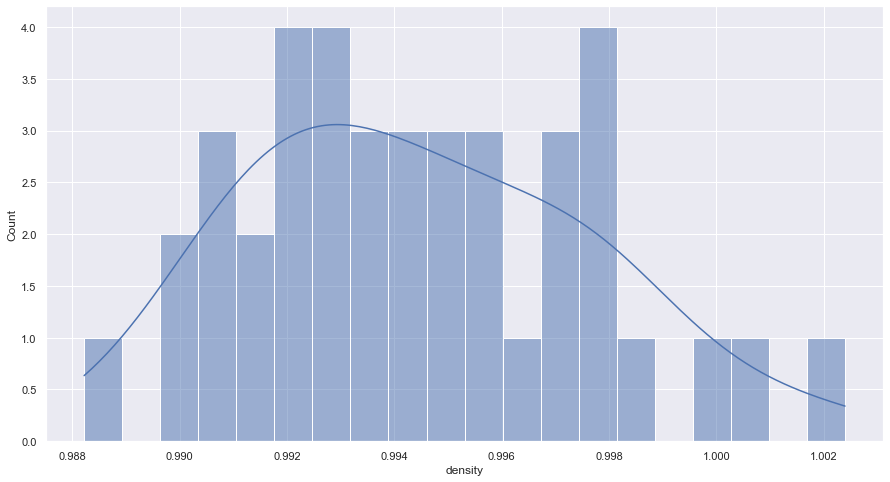

In [60]:
#(b)
sns.histplot(data, bins=20, kde=True)
plt.show()

ShapiroResult(statistic=0.9794914126396179, pvalue=0.6706609129905701)


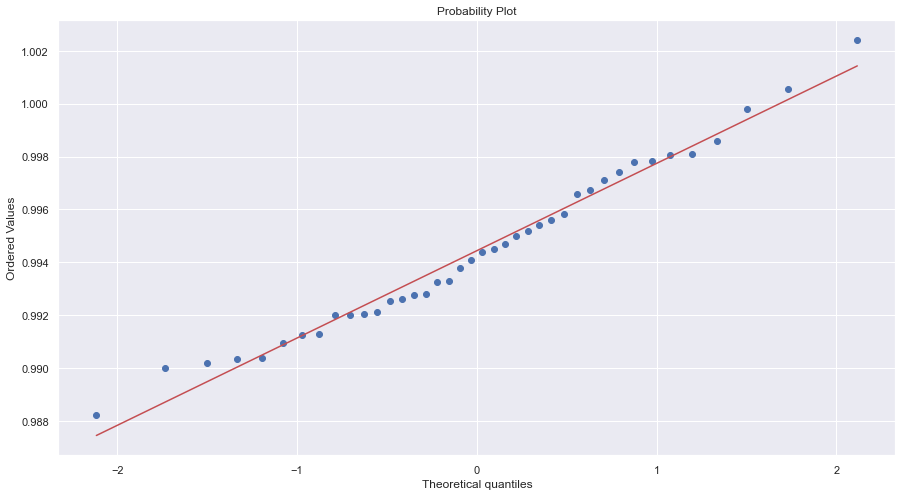

In [62]:
#(c)
print(stats.shapiro(data))
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(data, plot=ax)
plt.show()

### 11

In [64]:
#(a)
x = np.random.normal(loc=0, scale=np.sqrt(2), size=30)
x

array([ 0.94544331, -0.14117773, -0.32070723, -2.97202579,  2.42889259,
       -0.0243259 , -0.81024316, -0.70941848, -0.15070068,  0.89307825,
       -0.31486238, -1.91599657,  0.86980827, -1.0650868 ,  0.37477467,
        1.37365342,  1.24502467,  1.71165643, -2.61385819, -4.42121642,
        1.85902799,  0.76506974,  0.53484124,  1.7580809 ,  0.99898692,
        0.38785612,  3.45391198, -1.78219838,  1.33518817,  0.32560416])

0.13396937044053026 -0.34532239784511004


<AxesSubplot:ylabel='Count'>

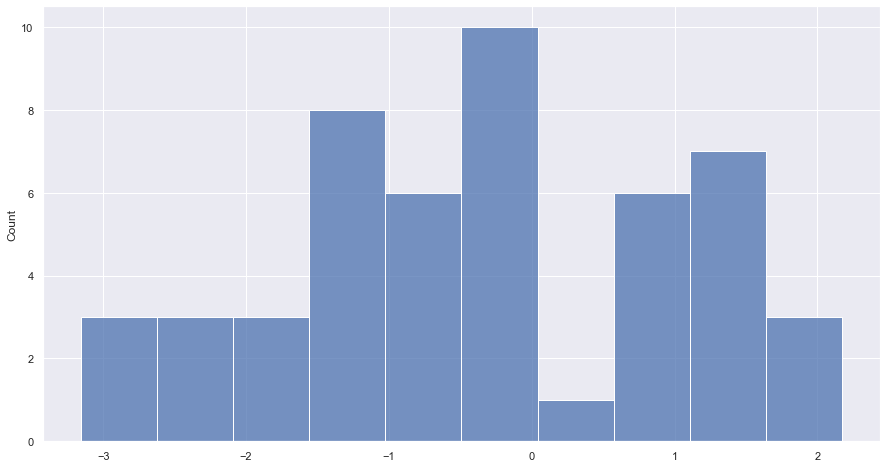

In [66]:
#(b)
x2 = np.random.normal(loc=0, scale=np.sqrt(2), size=50)
print(x.mean(), x2.mean())
sns.histplot(x2, bins=10)

ShapiroResult(statistic=0.9605439901351929, pvalue=0.3198293447494507)
ShapiroResult(statistic=0.9725554585456848, pvalue=0.2931464910507202)


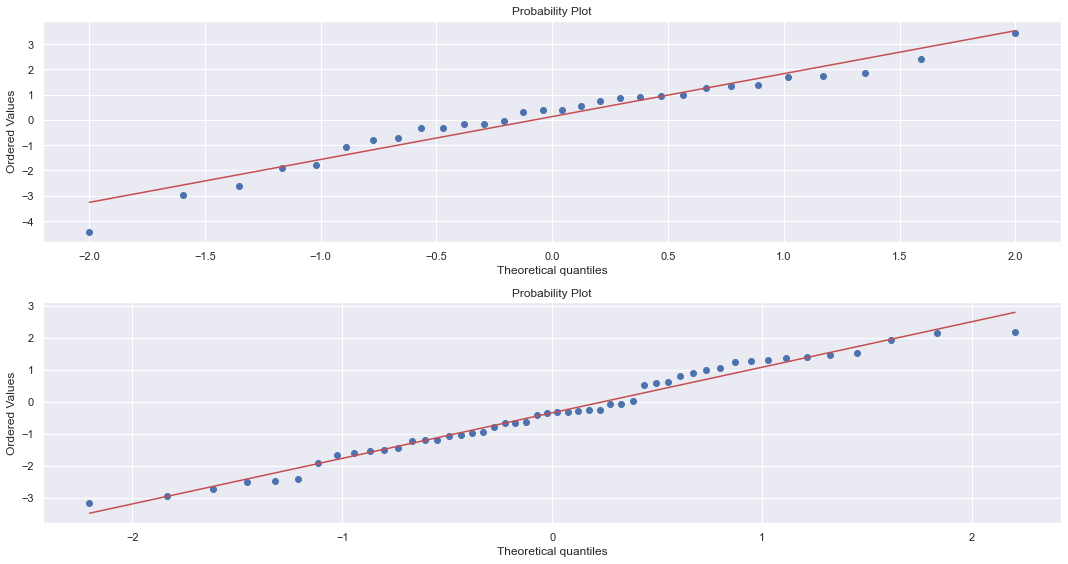

In [73]:
#(c)
fig = plt.figure()
print(stats.shapiro(x))
ax = fig.add_subplot(211)
stats.probplot(x, plot=ax)
print(stats.shapiro(x2))
ax = fig.add_subplot(212)
stats.probplot(x2, plot=ax)
plt.tight_layout()
plt.show()

In [75]:
#(d)
y = np.random.poisson(3, 30)
y

array([3, 1, 4, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 3, 1, 2, 4, 3, 3, 4, 3,
       5, 5, 5, 5, 6, 3, 2, 0])

<AxesSubplot:ylabel='Count'>

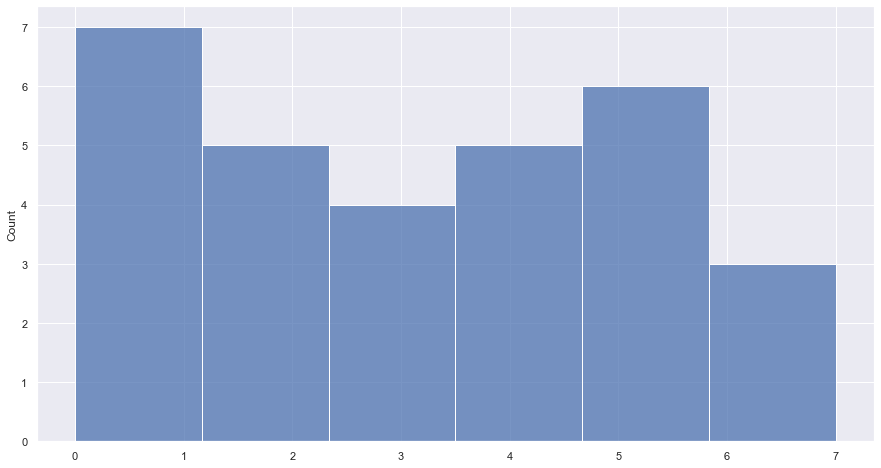

In [76]:
#(e)
y2 = np.random.poisson(3, 30)
sns.histplot(y2)

ShapiroResult(statistic=0.9503422379493713, pvalue=0.17266538739204407)


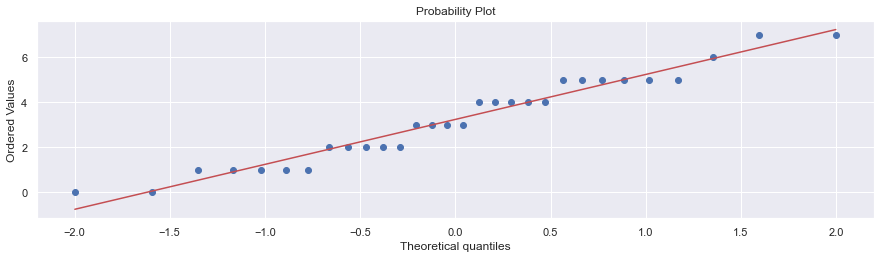

In [79]:
#(f)
fig = plt.figure()
print(stats.shapiro(y2))
ax = fig.add_subplot(211)
stats.probplot(y2, plot=ax)
plt.show()

### 12

In [104]:
n = np.random.normal(0, 1, 100)
e = np.random.exponential(3, 100)
na = np.log1p(e)

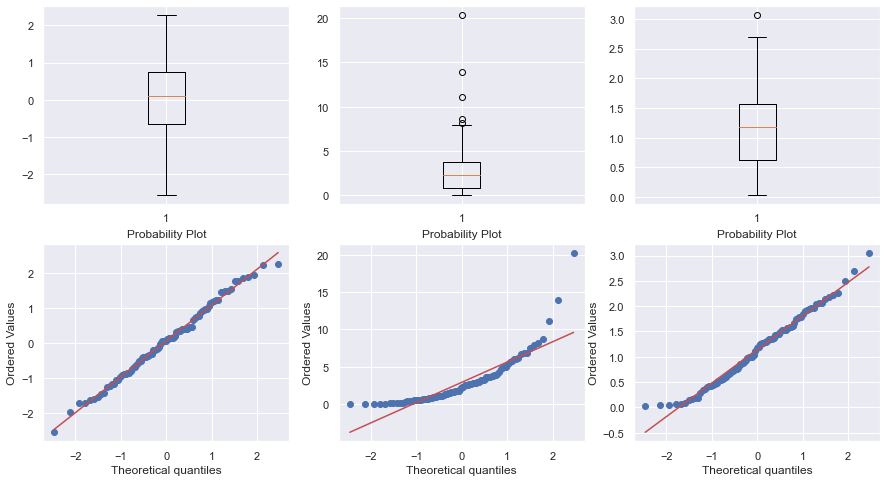

In [105]:
np.random.seed(0)
f, axes = plt.subplots(2, 3)
axes[0][0].boxplot(n)
probplot(n, plot=axes[1][0])
axes[0][1].boxplot(e)
probplot(e, plot=axes[1][1])
axes[0][2].boxplot(na)
probplot(na, plot=axes[1][2])
plt.show()